In [1]:
import warnings
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from pandas 
import datetime
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error


In [2]:
plt.style.use('fivethirtyeight')

In [3]:
folder_path = "./Dataset/Patna/Dynamic/"  # Replace with the path to your folder

os.listdir(folder_path)

['vayu_Patna_dynamic_sensor_data_August_2024.csv',
 'vayu_Patna_dynamic_sensor_data_December_2024.csv',
 'vayu_Patna_dynamic_sensor_data_February_2025.csv',
 'vayu_Patna_dynamic_sensor_data_January_2025.csv',
 'vayu_Patna_dynamic_sensor_data_July_2024.csv',
 'vayu_Patna_dynamic_sensor_data_June_2024.csv',
 'vayu_Patna_dynamic_sensor_data_March_2025.csv',
 'vayu_Patna_dynamic_sensor_data_November_2024.csv',
 'vayu_Patna_dynamic_sensor_data_October_2024.csv',
 'vayu_Patna_dynamic_sensor_data_September_2024.csv']

In [6]:
color = sns.color_palette()
print('Please wait. Importing data...')
multi_df = []

# df = pd.read_csv("vayu_Patna_dynamic_sensor_data_March_2025.csv", encoding = "ISO-8859-1")


# Folder containing the CSV files
folder_path = "./Dataset/Patna/Dynamic/"  # Replace with the path to your folder

# Loop through all files in the folder
for file in os.listdir(folder_path):
    if file.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, file)
        print(f"Reading {file_path}...")
        df1 = pd.read_csv(file_path, encoding="ISO-8859-1")  # Adjust encoding if needed
        multi_df.append(df1)

# Combine all DataFrames into one
df = pd.concat(multi_df, ignore_index=True)

print('import completed.')

Please wait. Importing data...
Reading ./Dataset/Patna/Dynamic/vayu_Patna_dynamic_sensor_data_August_2024.csv...
Reading ./Dataset/Patna/Dynamic/vayu_Patna_dynamic_sensor_data_December_2024.csv...
Reading ./Dataset/Patna/Dynamic/vayu_Patna_dynamic_sensor_data_February_2025.csv...
Reading ./Dataset/Patna/Dynamic/vayu_Patna_dynamic_sensor_data_January_2025.csv...
Reading ./Dataset/Patna/Dynamic/vayu_Patna_dynamic_sensor_data_July_2024.csv...
Reading ./Dataset/Patna/Dynamic/vayu_Patna_dynamic_sensor_data_June_2024.csv...


/tmp/ipykernel_42912/4173077908.py:16: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file_path, encoding="ISO-8859-1")  # Adjust encoding if needed


Reading ./Dataset/Patna/Dynamic/vayu_Patna_dynamic_sensor_data_March_2025.csv...
Reading ./Dataset/Patna/Dynamic/vayu_Patna_dynamic_sensor_data_November_2024.csv...
Reading ./Dataset/Patna/Dynamic/vayu_Patna_dynamic_sensor_data_October_2024.csv...
Reading ./Dataset/Patna/Dynamic/vayu_Patna_dynamic_sensor_data_September_2024.csv...
import completed.


In [7]:
def date_parser(x):
    return datetime.datetime.strptime(x, '%Y-%m-%d')

In [8]:
df.head()

,id,device_name,lat,long,pm_25,pm_10,no2,co,co2,ch4,temp,rh,data_created_time
0,1394763,TARA101,25.586355,85.178223,29.4,55.8,14.37,1.48,NaN,NaN,36.8,57.0,2024-08-01 00:00:00+00:00
1,1394785,TARA070,25.598154,85.171898,15.0,20.3,972.01,NaN,611.0,NaN,34.6,63.0,2024-08-01 00:00:00+00:00
2,1394786,TARA082,25.640917,85.104034,15.6,15.6,101.67,NaN,1258.0,NaN,28.6,45.0,2024-08-01 00:00:00+00:00
3,1394793,TARA090,25.599537,85.177139,28.6,38.6,532.40,NaN,462.0,NaN,34.1,66.0,2024-08-01 00:00:00+00:00
4,1394809,TARA101,25.586355,85.178223,39.3,63.3,4.57,1.35,NaN,NaN,36.8,57.0,2024-08-01 00:01:00+00:00


In [9]:
patna_data_temp = df[['data_created_time', 'temp']]

In [10]:
# patna_data = df[df.state == 'patna'].sort_values(by='date', ascending=0)
# patna_data_temp = df[['date', 'temp']]
patna_data_temp['temp'] = patna_data_temp['temp'].map(lambda x: str(x))
patna_data_temp = patna_data_temp[patna_data_temp.temp != 'nan']
patna_data_temp['temp'] = pd.to_numeric(patna_data_temp['temp'])
patna_data_temp['date'] = patna_data_temp['data_created_time'].map(lambda x: str(x)[:10])
patna_data_temp['date'] = patna_data_temp['date'].map(lambda x: date_parser(x))
patna_data_temp.index = patna_data_temp['date']
patna_data_temp = patna_data_temp.drop(['date'], axis=1)

/tmp/ipykernel_42912/1328314810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patna_data_temp['temp'] = patna_data_temp['temp'].map(lambda x: str(x))


In [11]:
patna_data_temp.tail()

,data_created_time,temp
date,,
2024-09-30,2024-09-30 23:58:00+00:00,34.3
2024-09-30,2024-09-30 23:58:00+00:00,33.0
2024-09-30,2024-09-30 23:59:00+00:00,35.7
2024-09-30,2024-09-30 23:59:00+00:00,34.3
2024-09-30,2024-09-30 23:59:00+00:00,33.0


In [12]:
patna_data_temp = patna_data_temp.fillna(patna_data_temp.bfill())
patna_data_temp = patna_data_temp['temp'].resample('D').mean()

date
2024-06-07    41.223605
2024-06-08    41.096731
2024-06-09    41.136627
2024-06-10    40.133183
2024-06-11    40.324599
                ...    
2025-03-14    33.487164
2025-03-15    33.384715
2025-03-16    33.673454
2025-03-17    33.276986
2025-03-18    32.900000
Freq: D, Name: temp, Length: 285, dtype: float64


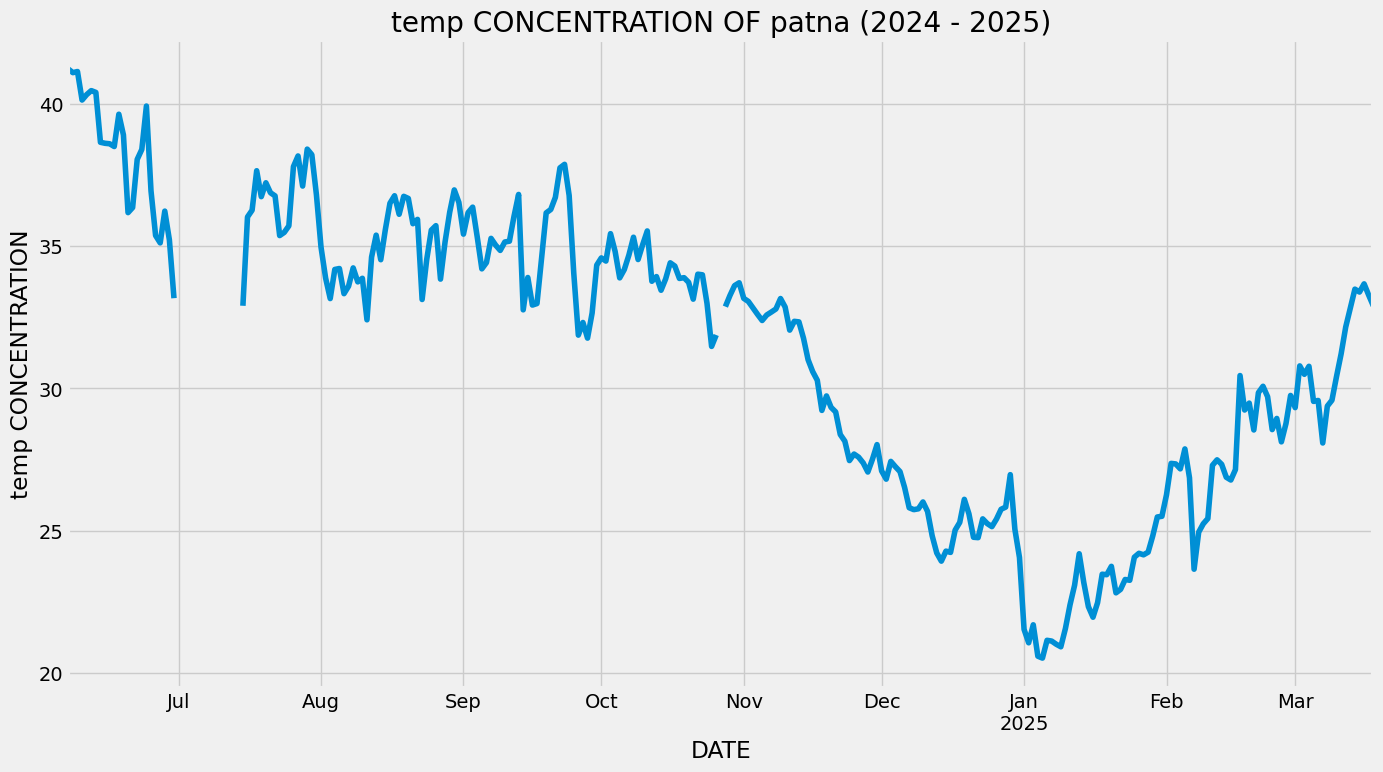

In [13]:

print(patna_data_temp)

patna_data_temp.plot(figsize=[15, 8])
plt.xlabel("DATE")
plt.ylabel("temp CONCENTRATION")
plt.title("temp CONCENTRATION OF patna (2024 - 2025)")
plt.show()

/home/deepesh/miniconda3/envs/myenv/lib/python3.8/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


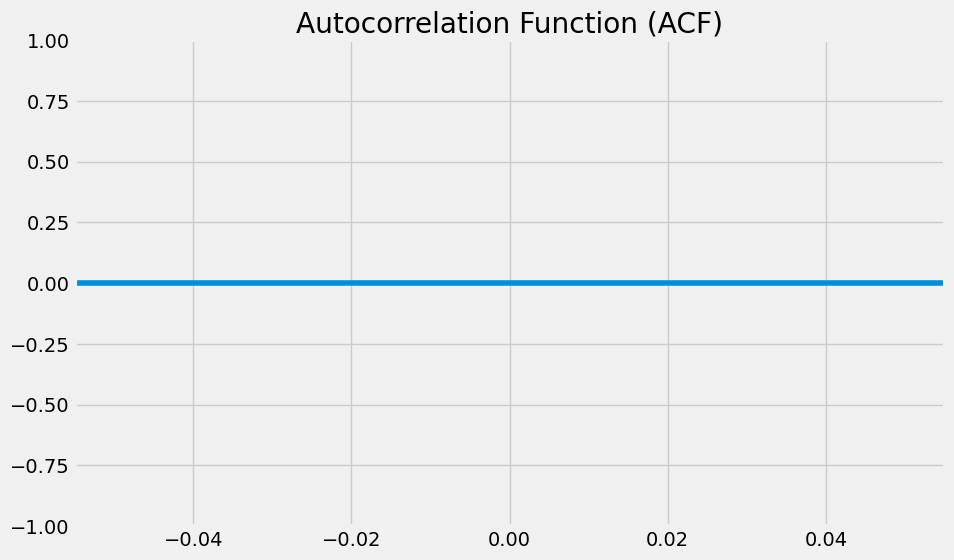

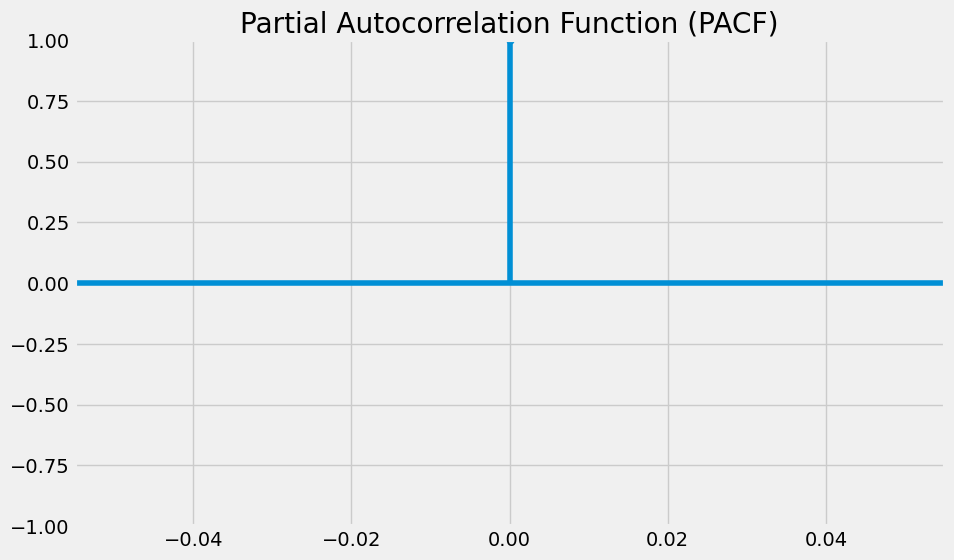

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF
plt.figure(figsize=(10, 6))
plot_acf(patna_data_temp, lags=30, ax=plt.gca())  # Adjust lags as needed
plt.title("Autocorrelation Function (ACF)")
plt.show()

# Plot PACF
plt.figure(figsize=(10, 6))
plot_pacf(patna_data_temp, lags=30, ax=plt.gca(), method='ywm')  # Adjust lags as needed
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46043D+00    |proj g|=  6.91744D-01

At iterate    5    f=  1.29044D+00    |proj g|=  5.15442D-01

At iterate   10    f=  1.24633D+00    |proj g|=  3.48444D-02


 This problem is unconstrained.



At iterate   15    f=  1.24021D+00    |proj g|=  2.51628D-02

At iterate   20    f=  1.21388D+00    |proj g|=  1.21351D-01
  ys=-1.123E-02  -gs= 1.296E-03 BFGS update SKIPPED

At iterate   25    f=  1.20838D+00    |proj g|=  4.23174D-02

At iterate   30    f=  1.20837D+00    |proj g|=  2.50207D-02

At iterate   35    f=  1.20835D+00    |proj g|=  1.22105D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38    101      2     1     0   1.288D-04   1.208D+00
  F =   1.2083507144827967     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/home/deepesh/miniconda3/envs/myenv/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9988      0.002    534.235      0.000       0.995       1.002
ma.L1          0.0268      0.054      0.501      0.616      -0.078       0.132
ar.S.L12      -0.7923      0.038    -21.028      0.000      -0.866      -0.718
ma.S.L12       0.8506      0.064     13.381      0.000       0.726       0.975
sigma2         0.8118      0.060     13.477      0.000       0.694       0.930


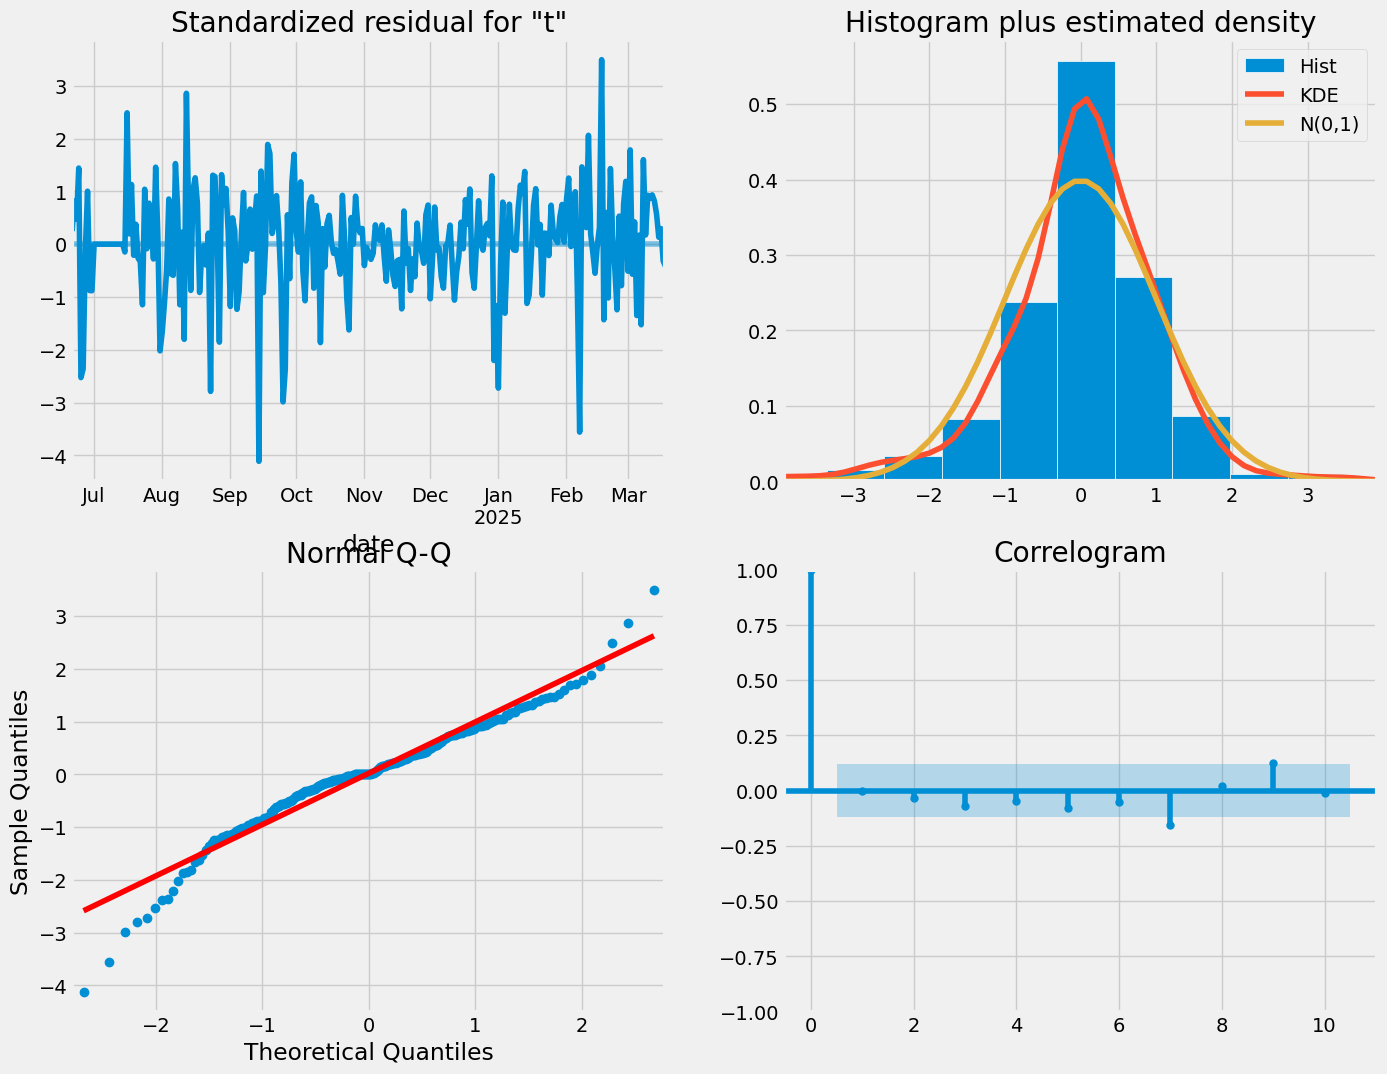

In [15]:

mod = sm.tsa.statespace.SARIMAX(patna_data_temp,
                                order=(1, 0, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

results.plot_diagnostics(figsize=(15, 12))
plt.show()

The Root Mean Squared Error of our prediction is 0.31
2025-03-19    32.840128
2025-03-20    32.940995
2025-03-21    32.877213
2025-03-22    32.860286
2025-03-23    32.844267
2025-03-24    32.759854
2025-03-25    32.809938
2025-03-26    32.668341
2025-03-27    32.790365
2025-03-28    32.719118
2025-03-29    32.725513
2025-03-30    32.625969
2025-03-31    32.593572
2025-04-01    32.442506
2025-04-02    32.421981
2025-04-03    32.364418
2025-04-04    32.306222
2025-04-05    32.302302
2025-04-06    32.191903
2025-04-07    32.233462
Freq: D, Name: predicted_mean, dtype: float64


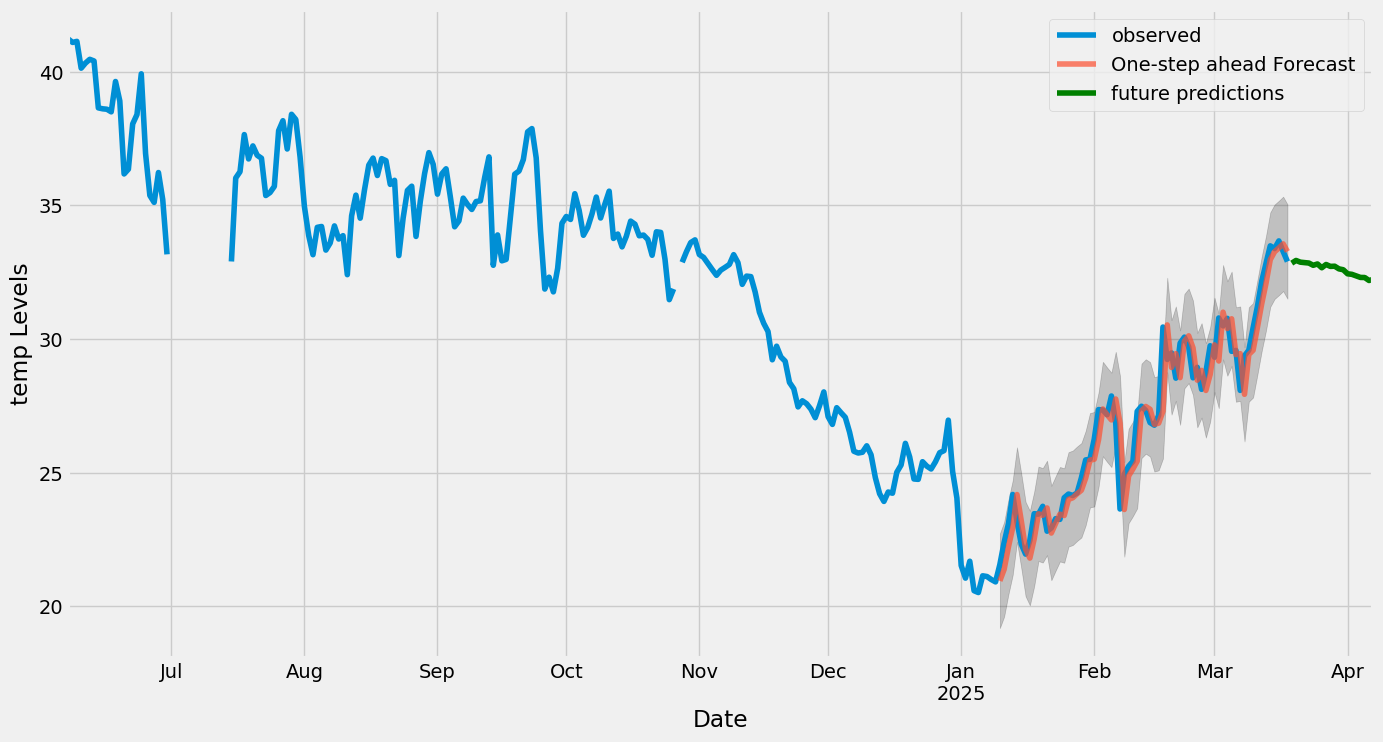

In [16]:

pred = results.get_prediction(start=pd.to_datetime('2025-01-10'), dynamic=False)
pred_ci = pred.conf_int()

ax = patna_data_temp['2024':].plot(figsize=[15, 8], label='observed')
pred.predicted_mean.plot(figsize=[15, 8], ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('temp Levels')
plt.legend()


patna_data_temp_forecasted = pred.predicted_mean
patna_data_temp_truth = patna_data_temp['2025-03-16':]

# Compute the mean square error
rmse = (((patna_data_temp_forecasted - patna_data_temp_truth) ** 2).mean()) ** 0.5
print('The Root Mean Squared Error of our prediction is {}'.format(round(rmse, 2)))

forecast = results.forecast(20)
print(forecast)
forecast.plot(figsize=[15, 8], color='green', label='future predictions')
plt.legend()
plt.show()